In [20]:
import matplotlib.pyplot as plt
import os
height = 12
width = height*1.6
plt.rcParams["figure.figsize"] = (width,height)
import numpy as np
# plt.style.use('seaborn-muted')


hierarchical = False

Dataset = "CIFAR10/"
# Dataset = "sat-6/"
# Dataset = "CIFAR100/"
# Dataset = "CIFAR100/hierarchical/"
# hierarchical = True
# Dataset = "MNIST/"

# model = "ResNet18"
model = "BranchedResNet18"
# model = "BranchedDenseNet18"


figure_directory = "../trained-models/"+model+"/"+Dataset

sub = 'energy_results/'

sub_directory = 'figures/'+sub

try:
    os.mkdir(figure_directory + sub_directory)
    print('Figure Folder Created..')
except FileExistsError:
    print('Figure Folder Exists..')
    
save_directory = figure_directory + sub_directory

def load(directory,runs):
    run = 0
    exit_values = np.load(directory+'exits-run'+"-"+str(run)+".npy")
    mac_readings = np.load(directory+'layerwise_macs.npy')
    
    for run in range(run+1,runs):
        value = np.load(directory+'exits-run'+"-"+str(run)+".npy")
        exit_values = np.vstack((exit_values,value))
    
    return exit_values,mac_readings

def get_label(branch_weights, model = 'B-Rnet ('):
    string = model
    for weight in branch_weights:
        weight = np.round(weight,decimals=3)
        string = string + str(weight) + " : "
    string = string[:-3]+')'
    return(string)

# single_branch_weights = ['020','040','060','080']
# single_means = list()
# single_stds = list()
# single_branches = list()
# for weighting in single_branch_weights: 
#     directory = figure_directory+"w"+weighting+probe_dir
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     branch_weights = np.load(figure_directory+"w"+weighting+"/metrics/branch-weights-"+model+".npy")
#     single_branches.append(branch_weights)
#     single_means.append(np.insert(mean,0,0))
#     single_stds.append(np.insert(std,0,0))
# for i in range(len(single_branch_weights)):
#     single_branch_weights[i] = single_branch_weights[i][0:1]+'.'+single_branch_weights[i][1:]


# hierarchical_weights = ['02','04','06','08']
# hierarchical_means = list()
# hierarchical_stds = list()
# hierarchical_branches = list()
# for weighting in hierarchical_weights: 
#     directory = figure_directory+"hierarchical/hwb1"+weighting+probe_dir
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     branch_weights = np.load(figure_directory+"hierarchical/hwb1"+weighting+"/metrics/branch-weights-"+model+".npy")
#     hierarchical_branches.append(branch_weights)
#     hierarchical_means.append(mean)
#     hierarchical_stds.append(std)
# for i in range(len(hierarchical_weights)):
#     hierarchical_weights[i] = hierarchical_weights[i][0:1]+'.'+hierarchical_weights[i][1:]+'0'

# pretrained_weights = ['02','04','06','08']
# pretrained_means = list()
# pretrained_stds = list()
# pretrained_branches = list()
# for weighting in pretrained_weights: 
#     directory = figure_directory+"ptr_wb1"+weighting+"_a"+probe_dir
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     branch_weights = np.load(figure_directory+"ptr_wb1"+weighting+"_a"+"/metrics/branch-weights-"+model+".npy")
#     pretrained_branches.append(branch_weights)
#     pretrained_means.append(np.insert(mean,0,0))
#     pretrained_stds.append(np.insert(std,0,0))
    
# finetuned_weights = ['02','04','06','08']
# finetuned_means = list()
# finetuned_stds = list()
# finetuned_branches = list()
# for weighting in finetuned_weights: 
#     directory = "../trained-models/ResNet18/"+Dataset+"ft_wb1"+weighting+probe_dir
#     mean,std = load(directory,"best-ResNet18-CIFAR-10",3)
#     branch_weights = np.load("../trained-models/ResNet18/"+Dataset+"ft_wb1"+weighting+"/metrics/pretrained-branch-weights-ResNet18.npy")
#     finetuned_branches.append(branch_weights)
#     finetuned_means.append(np.insert(mean,0,0))
#     finetuned_stds.append(np.insert(std,0,0))
    
# second_branch_weights = ['02','04','06']
# second_means = list()
# second_stds = list()
# second_branches = list()
# for weighting in second_branch_weights: 
#     directory = figure_directory+"wb102-b2"+weighting+"/linear-probe-values/accuracy/"
#     branch_weights = np.load(figure_directory+"wb102-b2"+weighting+"/metrics/branch-weights-"+model+".npy")
#     second_branches.append(branch_weights)
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     second_means.append(mean)
#     second_stds.append(std)

# second_branch_weights = ['02','04','06']
# second_means = list()
# second_stds = list()
# second_branches = list()
# for weighting in second_branch_weights: 
#     directory = figure_directory+"wb102-b2"+weighting+probe_dir
#     branch_weights = np.load(figure_directory+"wb102-b2"+weighting+"/metrics/branch-weights-"+model+".npy")
#     second_branches.append(branch_weights)
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     second_means.append(mean)
#     second_stds.append(std)
    
# third_branch_weights = ['02','04','06','08']
# third_means = list()
# third_stds = list()
# third_branches = list()
# for weighting in third_branch_weights: 
#     directory = figure_directory+"wb2"+weighting+"/linear-probe-values/accuracy/"
#     branch_weights = np.load(figure_directory+"wb2"+weighting+"/metrics/branch-weights-"+model+".npy")
#     single_branches.append(branch_weights)
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     single_means.append(np.insert(mean,0,0))
#     single_stds.append(np.insert(std,0,0))
    
# third_branch_weights = ['02','04','06','08']
# third_means = list()
# third_stds = list()
# third_branches = list()
# for weighting in third_branch_weights: 
#     directory = figure_directory+"wb3"+weighting+"/linear-probe-values/accuracy/"
#     branch_weights = np.load(figure_directory+"wb3"+weighting+"/metrics/branch-weights-"+model+".npy")
#     single_branches.append(branch_weights)
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     single_means.append(np.insert(mean,0,0))
#     single_stds.append(np.insert(std,0,0)) 
    
# third_branch_weights = ['02','04','06']
# third_means = list()
# third_stds = list()
# third_branches = list()
# for weighting in third_branch_weights: 
#     directory = figure_directory+"wb102-b3"+weighting+"/linear-probe-values/accuracy/"
#     branch_weights = np.load(figure_directory+"wb102-b3"+weighting+"/metrics/branch-weights-"+model+".npy")
#     third_branches.append(branch_weights)
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     third_means.append(mean)
#     third_stds.append(std)

multi_branch_weights = ['wb102-b203-b301','wb102-b202-b302','wb102-b201-b303','wb101-b202-b303']
exit_readings = list()
mac_readings = list()
multi_branches = list()
for weighting in multi_branch_weights: 
    directory = figure_directory+weighting+"/metrics/"
    branch_weights = np.load(figure_directory+weighting+"/metrics/branch-weights-"+model+".npy")
    multi_branches.append(branch_weights)
    exits,macs = load(directory,3)
    important_macs = np.take(macs,[1,2,3,16,31,46,61,62,63,64])
    exit_readings.append(exits)
    mac_readings.append(important_macs)

model = "BranchedMobileNet"
figure_directory = "../trained-models/"+model+"/"+Dataset
save_directory = figure_directory + sub_directory
try:
    os.mkdir(figure_directory + sub_directory)
    print('Figure Folder Created..')
except FileExistsError:
    print('Figure Folder Exists..')

multi_branch_weights = ['wb102-b203-b301','wb102-b202-b302','wb102-b201-b303','wb101-b202-b303']
mobile_exit_readings = list()
mobile_mac_readings = list()
mobile_branches = list()
for weighting in multi_branch_weights: 
    directory = figure_directory+weighting+"/metrics/"
    branch_weights = np.load(figure_directory+weighting+"/metrics/branch-weights-"+model+".npy")
    mobile_branches.append(branch_weights)
    exits,macs = load(directory,3)
    important_macs = np.take(macs,[2,6,10,16,20,36,48,61,79,98,117,135,154,172,191,210,214,218])
    mobile_exit_readings.append(exits)
    mobile_mac_readings.append(important_macs)
    
exit_readings = np.array(exit_readings)
mac_readings = np.array(mac_readings)[0,:]

mobile_exit_readings = np.array(mobile_exit_readings)
mobile_mac_readings = np.array(mobile_mac_readings)[0,:]

print(exit_readings.shape,mac_readings.shape)
print(mobile_exit_readings.shape, mobile_mac_readings.shape)

Figure Folder Exists..
Figure Folder Exists..
(4, 3, 10000) (10,)
(4, 3, 10000) (18,)


In [21]:
def get_exit_p(exit_readings):
    n_samples = exit_readings.shape[2]
    all_exits = list()
    for model in exit_readings:
        multi_run_exits = list()
        for run in model:
            exits = list()
            for i in range(4):
                exits.append(np.sum(run==i))
            multi_run_exits.append(exits)
        multi_run_exits=np.array(multi_run_exits)
        all_exits.append(multi_run_exits)

    all_exits = np.array(all_exits)
    mean_exits = np.mean(all_exits,axis=1)
    std_exits = np.std(all_exits,axis=1)

    exit_p = mean_exits/n_samples
    exit_p_std = std_exits/n_samples
    
    return(exit_p, exit_p_std)

exit_p, exit_p_std = get_exit_p(exit_readings)
m_exit_p, m_exit_p_std = get_exit_p(mobile_exit_readings)

In [22]:
simplenet_power = 557875206.0
# unbranched_power = 556651530.0
unbranched_power = 458113542.0
unbranched_mobile = np.sum(mobile_mac_readings[3:])
print(unbranched_mobile)

powers     = np.zeros(4)
powers[0]  = np.sum(np.take(mac_readings,[0,1,2,6]))
powers[1]  = np.sum(np.take(mac_readings,[0,1,2,3,6,7]))
powers[2]  = np.sum(np.take(mac_readings,[0,1,2,3,4,6,7,8]))
powers[3]  = np.sum(np.take(mac_readings,[0,1,2,3,4,5,6,7,8,9]))

mobile_powers     = np.zeros(4)
mobile_powers[0]  = np.sum(np.take(mobile_mac_readings,[0,3,4,5]))
mobile_powers[1]  = np.sum(np.take(mobile_mac_readings,[0,1,3,4,5,6,7,8]))
mobile_powers[2]  = np.sum(np.take(mobile_mac_readings,[0,1,2,3,4,6,7,8,9,10,11,12]))
mobile_powers[3]  = np.sum(mobile_mac_readings)

avg_powers = np.zeros(10)
avg_powers_std = np.zeros(10)

# avg_powers[0] = simplenet_power
avg_powers[0] = unbranched_power
# labels = ['SimpleNet','Unbranched ResNet']
labels = ['Unbranched ResNet']

for idx,  model in enumerate(exit_p):
    labels.append(get_label(multi_branches[idx]))
    avg_powers[idx+1] = np.sum(np.multiply(model,powers))
    avg_powers_std[idx+1] = np.sum(np.multiply(exit_p_std[idx],powers))
    
avg_powers[5] = unbranched_mobile
labels.append('Unbranched MobileNet')
    
for idx,  model in enumerate(m_exit_p):
    i = idx + 6
    avg_powers[i] = np.sum(np.multiply(model,mobile_powers))
    labels.append(get_label(mobile_branches[idx],model = 'B-Mnet ('))
    avg_powers_std[i] = np.sum(np.multiply(m_exit_p_std[idx],mobile_powers))
    

print(len(labels))
    
print(avg_powers)
print(avg_powers_std)

18582632.0
10
[4.58113542e+08 3.10568047e+08 3.04929704e+08 3.25332326e+08
 3.09478455e+08 1.85826320e+07 1.00987626e+07 1.29857958e+07
 1.04692283e+07 9.45051396e+06]
[       0.         12946681.51547555  4694623.97158236 13686098.82512979
  6650193.2912031         0.           268265.47484551        0.
   195585.60272272   144395.43372993]


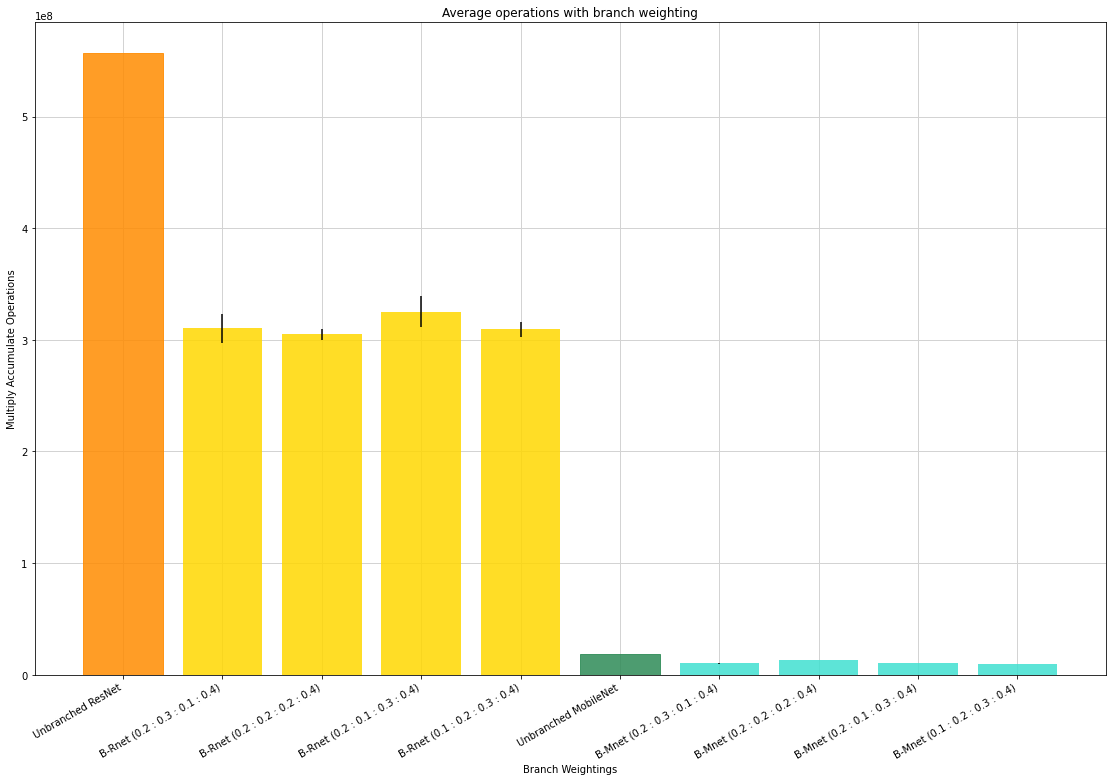

In [16]:
x_pos = [i for i, _ in enumerate(labels)]

ax = plt.axes()
plt.grid(color='lightgray', linestyle='-', linewidth=1)
sota = plt.bar(x_pos[0], avg_powers[0], color='orange',yerr=avg_powers_std[0],alpha=0.85)
ResNets = plt.bar(x_pos[1:6], avg_powers[1:6], color='gold',yerr=avg_powers_std[0:6],alpha=0.85)
MobileNets = plt.bar(x_pos[6:], avg_powers[6:], color='turquoise',yerr=avg_powers_std[6:],alpha=0.85)
sota[0].set_color('orangered')
ResNets[0].set_color('darkorange')
MobileNets[0].set_color('seagreen')
ax.set_axisbelow(True)
plt.xlabel("Branch Weightings")
plt.ylabel("Multiply Accumulate Operations")
plt.title("Average operations with branch weighting")
plt.xticks(x_pos, labels)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.savefig(save_directory+"/operation_usage.pdf")
plt.show()